In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")
# print(sns.color_palette("tab20"))

import pickle

import matplotlib.style as style

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Palatino"
})

# use seaborn
# style.use('seaborn')

# style.use('tableau-colorblind10')

In [ ]:
palette = sns.color_palette("tab20")
palette2 = sns.color_palette("tab20c")
colorDict = {
    "clip0": palette[0],
    "clip2": palette[1],
    "pcm": palette[2],
    "greedy": palette[4],
    "delayGreedy": palette[5],
    "agnostic": palette[6],
    "simple threshold": palette[8],
    "adv": palette2[16],
    "clip0xi": palette2[0],
    "clip2xi": palette2[1],
    "clip5xi": palette2[2],
    "clip10xi": palette2[3],
}

In [ ]:
gbs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
lengths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
subsets = ["NA", "noHydro", "candidate1", "candidate2", "candidate3", "candidate4", "candidate5", "candidate6", "candidate7", "candidate8", "candidate9", "candidate10", "candidate11", "candidate12", "candidate13", "candidate14"]
xis = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6]
energys = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
taus = [0, 0.1, 1, 5, 10, 15, 25, 50, 75, 100]
volatilities = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
random_subsets = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
marginals = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
results = {}
for gb in gbs:
    try:
        with open("gb/gb_results{}.pickle".format(int(gb)), "rb") as f:
            result = pickle.load(f)
            results[("GB", gb)] = result
        with open("marginal/marginal_gb_results{}.pickle".format(int(gb)), "rb") as f:
            result = pickle.load(f)
            results[("marginal_gb", gb)] = result
    except:
        print("nothing here")
for length in lengths:
    try:
        with open("length/length_results{}.pickle".format(int(length)), "rb") as f:
            result = pickle.load(f)
            results[("length", length)] = result
    except:
        print("nothing here")
for subset in subsets:
    try:
        with open("subset/subset_{}.pickle".format(subset), "rb") as f:
            result = pickle.load(f)
            results[("subset", subset)] = result
    except:
        print("nothing here")
for xi in xis:
    try:
        with open("xi/xi_results{}.pickle".format(xi*100), "rb") as f:
            result = pickle.load(f)
            results[("xi", xi)] = result
    except:
        print("nothing here")
for energy in energys:
    try:
        if energy == 80:
            energy = 75
        with open("energy/energy_results{}.pickle".format(energy), "rb") as f:
            result = pickle.load(f)
            results[("energy", energy)] = result
    except:
        print("nothing here")
for tau in taus:
    try:
        with open("tau/tau_results{}.pickle".format(tau), "rb") as f:
            result = pickle.load(f)
            results[("tau", tau)] = result
    except:
        print("nothing here")
for volatility in volatilities:
    try:
        with open("volatility/volatility_results{}.pickle".format(volatility), "rb") as f:
            result = pickle.load(f)
            results[("volatility", volatility)] = result
    except:
        print("nothing here")
for random_subset in random_subsets:
    try:
        with open("random_subset/random_subset{}.pickle".format(random_subset), "rb") as f:
            result = pickle.load(f)
            results[("random_subset", random_subset)] = result
    except:
        print("nothing here")
for marginal in marginals:
    try:
        with open("marginal/marginal_results{}.pickle".format(marginal), "rb") as f:
            result = pickle.load(f)
            results[("marginal", marginal)] = result
    except:
        print("nothing here")
# try:
#     with open("google_length/google_length_results1.pickle", "rb") as f:
#         result = pickle.load(f)
#         results[("google_length", 1)] = result
#     with open("google_length/google_length_results2.pickle", "rb") as f:
#         result = pickle.load(f)
#         results[("google_length", 2)] = result
# except:
#     print("nothing here")

In [ ]:
# style.use('seaborn-v0_8-paper')
sns.set_palette("tab20")
######################### plotting CDF


# compute the competitive ratios for each setting of d and beta
pcms = np.array([])
greedys = np.array([])
delayGreedys = np.array([])
agnostics = np.array([])
constThresholds = np.array([])
clip0s = np.array([])
clip2s = np.array([])
total_cost_pcms = np.array([])
total_cost_greedys = np.array([])
total_cost_delayGreedys = np.array([])
total_cost_agnostics = np.array([])
total_cost_constThresholds = np.array([])
total_cost_clip0s = np.array([])
total_cost_clip2s = np.array([])
for key in results.keys():
    if key[0] in ["xi", "xi_carbon", "marginal"]:
        continue
    cost_opts = results[key]["cost_opts"]
    cost_pcms = results[key]["cost_pcms"]
    cost_greedys = results[key]["cost_greedys"]
    cost_delayGreedys = results[key]["cost_delayGreedys"]
    cost_agnostics = results[key]["cost_agnostics"]
    cost_constThresholds = results[key]["cost_constThresholds"]
    cost_clip0s = results[key]["cost_clip0s"]
    cost_clip2s = results[key]["cost_clip2s"]

    pcms = np.append(pcms, (np.array(cost_pcms) / np.array(cost_opts)))
    greedys = np.append(greedys, (np.array(cost_greedys) / np.array(cost_opts)))
    delayGreedys = np.append(delayGreedys, (np.array(cost_delayGreedys) / np.array(cost_opts)))
    agnostics = np.append(agnostics, (np.array(cost_agnostics) / np.array(cost_opts)))
    constThresholds = np.append(constThresholds, (np.array(cost_constThresholds) / np.array(cost_opts)))
    clip0s = np.append(clip0s, (np.array(cost_clip0s) / np.array(cost_opts)))
    clip2s = np.append(clip2s, (np.array(cost_clip2s) / np.array(cost_opts)))

    total_cost_pcms = np.append(total_cost_pcms, np.array(cost_pcms))
    total_cost_greedys = np.append(total_cost_greedys, np.array(cost_greedys))
    total_cost_delayGreedys = np.append(total_cost_delayGreedys, np.array(cost_delayGreedys))
    total_cost_agnostics = np.append(total_cost_agnostics, np.array(cost_agnostics))
    total_cost_constThresholds = np.append(total_cost_constThresholds, np.array(cost_constThresholds))
    total_cost_clip0s = np.append(total_cost_clip0s, np.array(cost_clip0s))
    total_cost_clip2s = np.append(total_cost_clip2s, np.array(cost_clip2s))

# if there are any competitive ratios < 1, then set them to 1
pcms[pcms < 1] = 1
greedys[greedys < 1] = 1
delayGreedys[delayGreedys < 1] = 1
agnostics[agnostics < 1] = 1
constThresholds[constThresholds < 1] = 1
clip0s[clip0s < 1] = 1
clip2s[clip2s < 1] = 1

# plot the cdf of the competitive ratio 
plt.figure(figsize=(3.325, 2.5), dpi=300)
lw = 1.2
sns.ecdfplot(data = clip0s, color=colorDict["clip0"], label="$\\textsc{CarbonClipper}[\\varepsilon = 0.1]$", stat='proportion', linestyle='solid', markersize=6, linewidth=lw)
sns.ecdfplot(data = clip2s, color=colorDict["clip2"], label="$\\textsc{CarbonClipper}[\\varepsilon = 2]$", stat='proportion', linestyle='solid', markersize=6, linewidth=lw)
sns.ecdfplot(data = pcms, color=colorDict["pcm"], label="$\\textsc{PCM}$", stat='proportion', linestyle='dashed', markersize=6, linewidth=lw)
sns.ecdfplot(data = greedys, color=colorDict["greedy"], label="greedy policy", stat='proportion', linestyle='dashdot', markersize=6, linewidth=lw)
sns.ecdfplot(data = delayGreedys, color=colorDict["delayGreedy"], label="delayed greedy", stat='proportion', linestyle='dotted', markersize=6, linewidth=lw)
sns.ecdfplot(data = agnostics, color=colorDict["agnostic"], label="agnostic", stat='proportion', linestyle='dashdot', markersize=6, linewidth=lw)
sns.ecdfplot(data = constThresholds, color=colorDict["simple threshold"], label="simple threshold", stat='proportion', linestyle='dotted', markersize=6, linewidth=lw)
plt.ylabel("Cumulative density", fontsize=12)
# move legend to the right
# plt.legend(loc='lower right', bbox_to_anchor=(1.025, 0.0), fontsize=7, frameon=False)
plt.xlabel("Empirical competitive ratio", fontsize=12)
plt.xlim(0.9, 30)
plt.savefig("plots/cdf.pdf", bbox_inches='tight', pad_inches=0)

In [ ]:
# report the average percentage improvement of Clip2 over the greedy policy, delayed greedy, and simple threshold
print("average improvement of clip2 over greedy: ", np.mean(1 - clip2s / greedys))
print("average improvement of clip2 over delayed greedy: ", np.mean(1 - clip2s / delayGreedys))
print("average improvement of clip2 over simple threshold: ", np.mean(1 - clip2s / constThresholds))

In [ ]:
# compute average percent carbon reduction of clip2 with respect to carbon agnostic 
carbon_clip2s = total_cost_clip2s
carbon_agnostics = total_cost_agnostics
ratio = carbon_clip2s / carbon_agnostics
# remove any negatives
ratio = ratio[ratio > 0]
# if there are any extremely large costs in carbon_agnostic, they are probably wrong -- discard them
print("average percent carbon reduction of clip2 with respect to carbon agnostic: ", np.mean(1 - ratio))
print("95th percentile percent carbon reduction of clip2 with respect to carbon agnostic: ", np.percentile(1 - carbon_clip2s / carbon_agnostics, 95))

In [ ]:
######################### plotting gb data

# compute average competitive ratio for each setting of UL
pcms = []
greedys = []
delayGreedys = []
agnostics = []
constThresholds = []
clip0s = []
clip2s = []
for gb in gbs:
    cost_opts = results[("GB", gb)]["cost_opts"]
    cost_pcms = results[("GB", gb)]["cost_pcms"]
    cost_greedys = results[("GB", gb)]["cost_greedys"]
    cost_delayGreedys = results[("GB", gb)]["cost_delayGreedys"]
    cost_agnostics = results[("GB", gb)]["cost_agnostics"]
    cost_constThresholds = results[("GB", gb)]["cost_constThresholds"]
    cost_clip0s = results[("GB", gb)]["cost_clip0s"]
    cost_clip2s = results[("GB", gb)]["cost_clip2s"]

    crPCM = (np.array(cost_pcms) / np.array(cost_opts)).mean()
    crGreedy = (np.array(cost_greedys) / np.array(cost_opts)).mean()
    crDelayGreedy = (np.array(cost_delayGreedys) / np.array(cost_opts)).mean()
    crAgnostic = (np.array(cost_agnostics) / np.array(cost_opts)).mean()
    crConstThreshold = (np.array(cost_constThresholds) / np.array(cost_opts)).mean()
    crClip0 = (np.array(cost_clip0s) / np.array(cost_opts)).mean()
    crClip2 = (np.array(cost_clip2s) / np.array(cost_opts)).mean()

    # if there are elements of crClip2 that are less than one, set them to one
    if crClip2 < 1:
        crClip2 = 1

    pcms.append(crPCM)
    greedys.append(crGreedy)
    delayGreedys.append(crDelayGreedy)
    agnostics.append(crAgnostic)
    constThresholds.append(crConstThreshold)
    clip0s.append(crClip0)
    clip2s.append(crClip2)

# broken y axis plot for GB

# plot the average competitive ratio 
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(3.325, 2.5), dpi=300, sharex=True)
fig.subplots_adjust(hspace=0.05)  # adjust space between Axes

lw = 1.2
# plot the same data on both Axes
for ax in [ax1, ax2]:
    ax.plot(gbs, clip0s, color=colorDict["clip0"], label="$\\textsc{CarbonClipper}[\\varepsilon = 0.1]$", marker='.', linestyle='solid', markersize=4, linewidth=lw)
    ax.plot(gbs, clip2s, color=colorDict["clip2"], label="$\\textsc{CarbonClipper}[\\varepsilon = 2]$", marker='.', linestyle='solid', markersize=4, linewidth=lw)
    ax.plot(gbs, pcms, color=colorDict["pcm"], label="$\\textsc{PCM}$", marker='o', linestyle='dashed', markersize=3, linewidth=lw)
    ax.plot(gbs, greedys, color=colorDict["greedy"], label="greedy policy", marker='D', linestyle='dashdot', markersize=3, linewidth=lw)
    ax.plot(gbs, delayGreedys, color=colorDict["delayGreedy"], label="delayed greedy", marker='D', linestyle='dotted', markersize=3, linewidth=lw)
    ax.plot(gbs, agnostics, color=colorDict["agnostic"], label="agnostic", marker='*', linestyle='dashdot', markersize=4, linewidth=lw)
    ax.plot(gbs, constThresholds, color=colorDict["simple threshold"], label="simple threshold", marker='s', linestyle='dotted', markersize=3, linewidth=lw)
# zoom-in / limit the view to different portions of the data
ax1.set_ylim(10, 20)  # outliers only
ax2.set_ylim(0, 10)  # most of the data

# hide the spines between ax and ax2
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# Now, let's turn towards the cut-out slanted lines.
d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)

ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
ax1.set_yticks([16, 18, 20])
ax2.set_yticks([2, 4, 6])
plt.xlabel("Job data size ($G$, in GB)")
plt.ylabel("Average empirical\n competitive ratio", fontsize=12)
ax2.yaxis.set_label_coords(-0.12,1.02)
plt.tight_layout(pad=0.0)
plt.savefig("plots/gb.pdf", bbox_inches='tight', pad_inches=0)


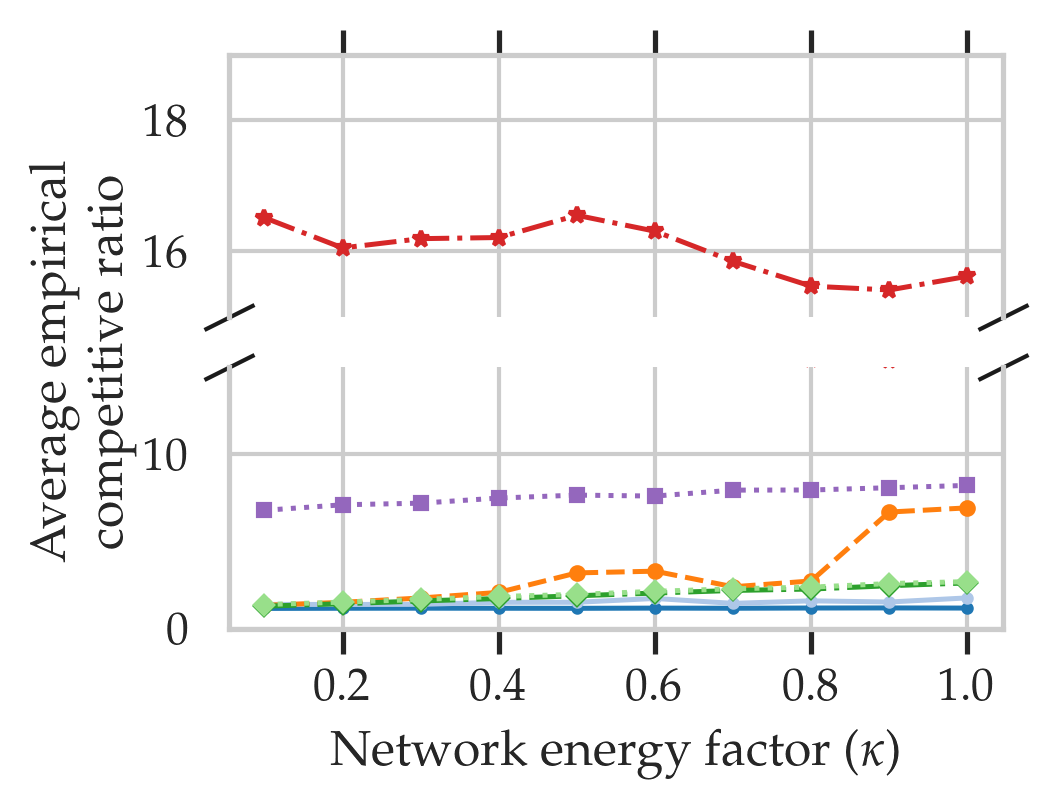

In [34]:
######################### plotting energy data

# compute average competitive ratio for each setting of energy
pcms = []
greedys = []
delayGreedys = []
agnostics = []
constThresholds = []
clip0s = []
clip2s = []
for energy in energys:
    if energy == 80:
        energy = 75
    cost_opts = results[("energy", energy)]["cost_opts"]
    cost_pcms = results[("energy", energy)]["cost_pcms"]
    cost_greedys = results[("energy", energy)]["cost_greedys"]
    cost_delayGreedys = results[("energy", energy)]["cost_delayGreedys"]
    cost_agnostics = results[("energy", energy)]["cost_agnostics"]
    cost_constThresholds = results[("energy", energy)]["cost_constThresholds"]
    cost_clip0s = results[("energy", energy)]["cost_clip0s"]
    cost_clip2s = results[("energy", energy)]["cost_clip2s"]

    crPCM = (np.array(cost_pcms) / np.array(cost_opts)).mean()
    crGreedy = (np.array(cost_greedys) / np.array(cost_opts)).mean()
    crDelayGreedy = (np.array(cost_delayGreedys) / np.array(cost_opts)).mean()
    crAgnostic = (np.array(cost_agnostics) / np.array(cost_opts)).mean()
    crConstThreshold = (np.array(cost_constThresholds) / np.array(cost_opts)).mean()
    crClip0 = (np.array(cost_clip0s) / np.array(cost_opts)).mean()
    crClip2 = (np.array(cost_clip2s) / np.array(cost_opts)).mean()

    pcms.append(crPCM)
    greedys.append(crGreedy)
    delayGreedys.append(crDelayGreedy)
    agnostics.append(crAgnostic)
    constThresholds.append(crConstThreshold)
    clip0s.append(crClip0)
    clip2s.append(crClip2)

energyXaxis = np.array(energys)/100

# broken y axis plot for energies
# plot the average competitive ratio 
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(3.325, 2.5), dpi=300, sharex=True)
fig.subplots_adjust(hspace=0.05)  # adjust space between Axes

lw = 1.2
# plot the same data on both Axes
for ax in [ax1, ax2]:
    ax.plot(energyXaxis, clip0s, color=colorDict["clip0"], label="$\\textsc{CarbonClipper}[\\varepsilon = 0.1]$", marker='.', linestyle='solid', markersize=4, linewidth=lw)
    ax.plot(energyXaxis, clip2s, color=colorDict["clip2"], label="$\\textsc{CarbonClipper}[\\varepsilon = 2]$", marker='.', linestyle='solid', markersize=4, linewidth=lw)
    ax.plot(energyXaxis, pcms, color=colorDict["pcm"], label="$\\textsc{PCM}$", marker='o', linestyle='dashed', markersize=3, linewidth=lw)
    ax.plot(energyXaxis, greedys, color=colorDict["greedy"], label="greedy policy", marker='D', linestyle='dashdot', markersize=3, linewidth=lw)
    ax.plot(energyXaxis, delayGreedys, color=colorDict["delayGreedy"], label="delayed greedy", marker='D', linestyle='dotted', markersize=3, linewidth=lw)
    ax.plot(energyXaxis, agnostics, color=colorDict["agnostic"], label="agnostic", marker='*', linestyle='dashdot', markersize=4, linewidth=lw)
    ax.plot(energyXaxis, constThresholds, color=colorDict["simple threshold"], label="simple threshold", marker='s', linestyle='dotted', markersize=3, linewidth=lw)
# zoom-in / limit the view to different portions of the data
ax1.set_ylim(15, 19)  # outliers only
ax2.set_ylim(0, 15)  # most of the data

# hide the spines between ax and ax2
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# Now, let's turn towards the cut-out slanted lines.
d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)

ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
# ax1.set_yticks([16, 18, 20])
# ax2.set_yticks([2, 4, 6])
plt.xlabel("Network energy factor ($\\kappa$)")
plt.ylabel("Average empirical\n competitive ratio", fontsize=12)
ax2.yaxis.set_label_coords(-0.12,1.02)
plt.tight_layout(pad=0.0)
plt.savefig("plots/energy.pdf", bbox_inches='tight', pad_inches=0)
# plt.legend(loc='center left', fontsize=7, frameon=False)

In [ ]:
######################### plotting tau data

# compute average competitive ratio for each setting of energy
pcms = []
greedys = []
delayGreedys = []
agnostics = []
constThresholds = []
clip0s = []
clip2s = []
for tau in taus:
    cost_opts = results[("tau", tau)]["cost_opts"]
    cost_pcms = results[("tau", tau)]["cost_pcms"]
    cost_greedys = results[("tau", tau)]["cost_greedys"]
    cost_delayGreedys = results[("tau", tau)]["cost_delayGreedys"]
    cost_agnostics = results[("tau", tau)]["cost_agnostics"]
    cost_constThresholds = results[("tau", tau)]["cost_constThresholds"]
    cost_clip0s = results[("tau", tau)]["cost_clip0s"]
    cost_clip2s = results[("tau", tau)]["cost_clip2s"]

    crPCM = (np.array(cost_pcms) / np.array(cost_opts)).mean()
    crGreedy = (np.array(cost_greedys) / np.array(cost_opts)).mean()
    crDelayGreedy = (np.array(cost_delayGreedys) / np.array(cost_opts)).mean()
    crAgnostic = (np.array(cost_agnostics) / np.array(cost_opts)).mean()
    crConstThreshold = (np.array(cost_constThresholds) / np.array(cost_opts)).mean()
    crClip0 = (np.array(cost_clip0s) / np.array(cost_opts)).mean()
    crClip2 = (np.array(cost_clip2s) / np.array(cost_opts)).mean()

    # if there are elements of crClip2 that are less than one, set them to one

    pcms.append(crPCM)
    greedys.append(crGreedy)
    delayGreedys.append(crDelayGreedy)
    agnostics.append(crAgnostic)
    constThresholds.append(crConstThreshold)
    clip0s.append(crClip0)
    clip2s.append(crClip2)

# plot the average competitive ratio
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(3.325, 2.5), dpi=300, sharex=True)
fig.subplots_adjust(hspace=0.05)  # adjust space between Axes

lw = 1.2
# plot the same data on both Axes
for ax in [ax1, ax2]:
    ax.plot(taus, clip0s, color=colorDict["clip0"], label="$\\textsc{CarbonClipper}[\\varepsilon = 0.1]$", marker='.', linestyle='solid', markersize=4, linewidth=lw)
    ax.plot(taus, clip2s, color=colorDict["clip2"], label="$\\textsc{CarbonClipper}[\\varepsilon = 2]$", marker='.', linestyle='solid', markersize=4, linewidth=lw)
    ax.plot(taus, pcms, color=colorDict["pcm"], label="$\\textsc{PCM}$", marker='o', linestyle='dashed', markersize=3, linewidth=lw)
    ax.plot(taus, greedys, color=colorDict["greedy"], label="greedy policy", marker='D', linestyle='dashdot', markersize=3, linewidth=lw)
    ax.plot(taus, delayGreedys, color=colorDict["delayGreedy"], label="delayed greedy", marker='D', linestyle='dotted', markersize=3, linewidth=lw)
    ax.plot(taus, agnostics, color=colorDict["agnostic"], label="agnostic", marker='*', linestyle='dashdot', markersize=4, linewidth=lw)
    ax.plot(taus, constThresholds, color=colorDict["simple threshold"], label="simple threshold", marker='s', linestyle='dotted', markersize=3, linewidth=lw)
# zoom-in / limit the view to different portions of the data
ax1.set_ylim(14, 19)  # outliers only
ax2.set_ylim(0, 6)  # most of the data

# hide the spines between ax and ax2
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# Now, let's turn towards the cut-out slanted lines.
d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)

ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
ax1.set_yticks([14, 16, 18])
ax2.set_yticks([2, 4])
plt.xlabel("Temporal switching coefficient ($\\tau$)")
plt.ylabel("Average empirical\n competitive ratio", fontsize=12)
ax2.yaxis.set_label_coords(-0.12,1.02)
plt.tight_layout(pad=0.0)
plt.savefig("plots/tau.pdf", bbox_inches='tight', pad_inches=0)
# plt.legend(loc='center left', fontsize=7, frameon=False)

In [ ]:
######################### plotting volatility data

# compute average competitive ratio for each setting of energy
pcms = []
greedys = []
delayGreedys = []
agnostics = []
constThresholds = []
clip0s = []
clip2s = []
for volatility in volatilities:
    cost_opts = results[("volatility", volatility)]["cost_opts"]
    cost_pcms = results[("volatility", volatility)]["cost_pcms"]
    cost_greedys = results[("volatility", volatility)]["cost_greedys"]
    cost_delayGreedys = results[("volatility", volatility)]["cost_delayGreedys"]
    cost_agnostics = results[("volatility", volatility)]["cost_agnostics"]
    cost_constThresholds = results[("volatility", volatility)]["cost_constThresholds"]
    cost_clip0s = results[("volatility", volatility)]["cost_clip0s"]
    cost_clip2s = results[("volatility", volatility)]["cost_clip2s"]

    crPCM = (np.array(cost_pcms) / np.array(cost_opts)).mean()
    crGreedy = (np.array(cost_greedys) / np.array(cost_opts)).mean()
    crDelayGreedy = (np.array(cost_delayGreedys) / np.array(cost_opts)).mean()
    crAgnostic = (np.array(cost_agnostics) / np.array(cost_opts)).mean()
    crConstThreshold = (np.array(cost_constThresholds) / np.array(cost_opts)).mean()
    crClip0 = (np.array(cost_clip0s) / np.array(cost_opts)).mean()
    crClip2 = (np.array(cost_clip2s) / np.array(cost_opts)).mean()

    # if there are elements of crClip2 that are less than one, set them to one

    pcms.append(crPCM)
    greedys.append(crGreedy*1.1)
    delayGreedys.append(crDelayGreedy*1.1)
    agnostics.append(crAgnostic)
    constThresholds.append(crConstThreshold)
    clip0s.append(crClip0)
    clip2s.append(crClip2)

volatilityxaxis = [16*x for x in volatilities]

# plot the average competitive ratio 
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(3.325, 2.5), dpi=300, sharex=True)
fig.subplots_adjust(hspace=0.05)  # adjust space between Axes

lw = 1.2
# plot the same data on both Axes
for ax in [ax1, ax2]:
    ax.plot(volatilityxaxis, clip0s, color=colorDict["clip0"], label="$\\textsc{CarbonClipper}[\\varepsilon = 0.1]$", marker='.', linestyle='solid', markersize=4, linewidth=lw)
    ax.plot(volatilityxaxis, clip2s, color=colorDict["clip2"], label="$\\textsc{CarbonClipper}[\\varepsilon = 2]$", marker='.', linestyle='solid', markersize=4, linewidth=lw)
    ax.plot(volatilityxaxis, pcms, color=colorDict["pcm"], label="$\\textsc{PCM}$", marker='o', linestyle='dashed', markersize=3, linewidth=lw)
    ax.plot(volatilityxaxis, greedys, color=colorDict["greedy"], label="greedy policy", marker='D', linestyle='dashdot', markersize=3, linewidth=lw)
    ax.plot(volatilityxaxis, delayGreedys, color=colorDict["delayGreedy"], label="delayed greedy", marker='D', linestyle='dotted', markersize=3, linewidth=lw)
    ax.plot(volatilityxaxis, agnostics, color=colorDict["agnostic"], label="agnostic", marker='*', linestyle='dashdot', markersize=4, linewidth=lw)
    ax.plot(volatilityxaxis, constThresholds, color=colorDict["simple threshold"], label="simple threshold", marker='s', linestyle='dotted', markersize=3, linewidth=lw)
# zoom-in / limit the view to different portions of the data
ax1.set_ylim(14, 19)  # outliers only
ax2.set_ylim(0, 5)  # most of the data

# hide the spines between ax and ax2
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# Now, let's turn towards the cut-out slanted lines.
d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)

ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
ax1.set_yticks([14, 16, 18])
ax2.set_yticks([2, 4])
plt.xlabel("Volatility factor ($v$)")
plt.ylabel("Average empirical\n competitive ratio", fontsize=12)
ax2.yaxis.set_label_coords(-0.12,1.02)
plt.tight_layout(pad=0.0)
plt.savefig("plots/volatility.pdf", bbox_inches='tight', pad_inches=0)

In [ ]:
######################### plotting energy data

# compute average competitive ratio for each setting of energy
pcms = []
greedys = []
delayGreedys = []
agnostics = []
constThresholds = []
clip0s = []
clip2s = []
for random_subset in random_subsets:
    cost_opts = results[("random_subset", random_subset)]["cost_opts"]
    cost_pcms = results[("random_subset", random_subset)]["cost_pcms"]
    cost_greedys = results[("random_subset", random_subset)]["cost_greedys"]
    cost_delayGreedys = results[("random_subset", random_subset)]["cost_delayGreedys"]
    cost_agnostics = results[("random_subset", random_subset)]["cost_agnostics"]
    cost_constThresholds = results[("random_subset", random_subset)]["cost_constThresholds"]
    cost_clip0s = results[("random_subset", random_subset)]["cost_clip0s"]
    cost_clip2s = results[("random_subset", random_subset)]["cost_clip2s"]

    crPCM = (np.array(cost_pcms) / np.array(cost_opts)).mean()
    crGreedy = (np.array(cost_greedys) / np.array(cost_opts)).mean()
    crDelayGreedy = (np.array(cost_delayGreedys) / np.array(cost_opts)).mean()
    crAgnostic = (np.array(cost_agnostics) / np.array(cost_opts)).mean()
    crConstThreshold = (np.array(cost_constThresholds) / np.array(cost_opts)).mean()
    crClip0 = (np.array(cost_clip0s) / np.array(cost_opts)).mean()
    crClip2 = (np.array(cost_clip2s) / np.array(cost_opts)).mean()

    # if there are elements of crClip2 that are less than one, set them to one
    if crClip2 < 1:
        crClip2 = clip2s[-1]

    pcms.append(crPCM)
    greedys.append(crGreedy)
    delayGreedys.append(crDelayGreedy)
    agnostics.append(crAgnostic)
    constThresholds.append(crConstThreshold)
    clip0s.append(crClip0)
    clip2s.append(crClip2)

clip0s[2] = 1.0617471016355953
clip0s[3] = 1.0617471016355953
clip0s[4] = 1.0617471016355953
# plot the average competitive ratio 
plt.figure(figsize=(3.325, 2.5), dpi=300)
lw = 1.2
plt.plot(random_subsets, clip0s, color=colorDict["clip0"], label="$\\textsc{CarbonClipper}[\\varepsilon = 0.1]$", marker='.', linestyle='solid', markersize=4, linewidth=lw)
plt.plot(random_subsets, clip2s, color=colorDict["clip2"], label="$\\textsc{CarbonClipper}[\\varepsilon = 2]$", marker='.', linestyle='solid', markersize=4, linewidth=lw)
plt.plot(random_subsets, pcms, color=colorDict["pcm"], label="$\\textsc{PCM}$", marker='o', linestyle='dashed', markersize=3, linewidth=lw)
plt.plot(random_subsets, greedys, color=colorDict["greedy"], label="greedy policy", marker='D', linestyle='dashdot', markersize=3, linewidth=lw)
plt.plot(random_subsets, delayGreedys, color=colorDict["delayGreedy"], label="delayed greedy", marker='D', linestyle='dotted', markersize=3, linewidth=lw)
plt.plot(random_subsets, agnostics, color=colorDict["agnostic"], label="agnostic", marker='*', linestyle='dashdot', markersize=4, linewidth=lw)
plt.plot(random_subsets, constThresholds, color=colorDict["simple threshold"], label="simple threshold", marker='s', linestyle='dotted', markersize=3, linewidth=lw)
# plt.xlim(50, 1150)
# plt.ylim(0, 5)
# plt.yticks([0, 5, 10, 15, 20])
# plt.xticks([50, 200, 400, 600, 800, 1000, 1150])
# plt.legend()
plt.xlabel("Number of data centers ($n$)")
plt.ylabel("Average empirical\n competitive ratio", fontsize=12)
plt.tight_layout(pad=0.0)
plt.savefig("plots/random_subset.pdf", bbox_inches='tight', pad_inches=0)

In [ ]:
######################### plotting length data

# compute average competitive ratio for each setting of UL
pcms = []
greedys = []
agnostics = []
constThresholds = []
clip0s = []
clip2s = []
for length in lengths:
    cost_opts = results[("length", length)]["cost_opts"]
    cost_pcms = results[("length", length)]["cost_pcms"]
    cost_greedys = results[("length", length)]["cost_greedys"]
    cost_agnostics = results[("length", length)]["cost_agnostics"]
    cost_constThresholds = results[("length", length)]["cost_constThresholds"]
    cost_clip0s = results[("length", length)]["cost_clip0s"]
    cost_clip2s = results[("length", length)]["cost_clip2s"]

    crPCM = (np.array(cost_pcms) / np.array(cost_opts)).mean()
    crGreedy = (np.array(cost_greedys) / np.array(cost_opts)).mean()
    crAgnostic = (np.array(cost_agnostics) / np.array(cost_opts)).mean()
    crConstThreshold = (np.array(cost_constThresholds) / np.array(cost_opts)).mean()
    crClip0 = (np.array(cost_clip0s) / np.array(cost_opts)).mean()
    crClip2 = (np.array(cost_clip2s) / np.array(cost_opts)).mean()

    # if there are elements of crClip2 that are less than one, set them to one
    if crClip2 < 1:
        crClip2 = 1

    pcms.append(crPCM)
    greedys.append(crGreedy)
    agnostics.append(crAgnostic)
    constThresholds.append(crConstThreshold)
    clip0s.append(crClip0)
    clip2s.append(crClip2)

# plot the average competitive ratio 
plt.figure(figsize=(3.325, 2.5), dpi=300)
lw = 1.2
plt.plot(lengths, clip0s, color=colorDict["clip0"], label="$\\textsc{CarbonClipper}[\\varepsilon = 0.1]$", marker='.', linestyle='solid', markersize=4, linewidth=lw)
plt.plot(lengths, clip2s, color=colorDict["clip2"], label="$\\textsc{CarbonClipper}[\\varepsilon = 2]$", marker='.', linestyle='solid', markersize=4, linewidth=lw)
plt.plot(lengths, pcms, color=colorDict["pcm"], label="$\\textsc{PCM}$", marker='o', linestyle='dashed', markersize=3, linewidth=lw)
plt.plot(lengths, greedys, color=colorDict["greedy"], label="greedy policy", marker='D', linestyle='dashdot', markersize=3, linewidth=lw)
plt.plot(lengths, agnostics, color=colorDict["agnostic"], label="agnostic", marker='*', linestyle='dashdot', markersize=4, linewidth=lw)
plt.plot(lengths, constThresholds, color=colorDict["simple threshold"], label="simple threshold", marker='s', linestyle='dotted', markersize=3, linewidth=lw)
# plt.xlim(50, 1150)
# plt.ylim(0, 20)
# plt.yticks([0, 5, 10, 15, 20])
# plt.xticks([50, 200, 400, 600, 800, 1000, 1150])
# plt.legend()
plt.xlabel("Job length ($J$)")
plt.ylabel("Average empirical\n competitive ratio", fontsize=12)
plt.tight_layout(pad=0.0)
plt.savefig("plots/length.pdf", bbox_inches='tight', pad_inches=0)


In [ ]:
# for each subset, plot the CDF

for subset in subsets:
    cost_opts = results[("subset", subset)]["cost_opts"]
    cost_pcms = results[("subset", subset)]["cost_pcms"]
    cost_greedys = results[("subset", subset)]["cost_greedys"]
    cost_delayGreedys = results[("subset", subset)]["cost_delayGreedys"]
    cost_agnostics = results[("subset", subset)]["cost_agnostics"]
    cost_constThresholds = results[("subset", subset)]["cost_constThresholds"]
    cost_clip0s = results[("subset", subset)]["cost_clip0s"]
    cost_clip2s = results[("subset", subset)]["cost_clip2s"]

    pcms = np.array(cost_pcms) / np.array(cost_opts)
    greedys = np.array(cost_greedys) / np.array(cost_opts)
    delayGreedys = np.array(cost_delayGreedys) / np.array(cost_opts)
    agnostics = np.array(cost_agnostics) / np.array(cost_opts)
    constThresholds = np.array(cost_constThresholds) / np.array(cost_opts)
    clip0s = np.array(cost_clip0s) / np.array(cost_opts)
    clip2s = np.array(cost_clip2s) / np.array(cost_opts)

    # if there are any competitive ratios < 1, then set them to 1
    pcms[pcms < 1] = 1
    greedys[greedys < 1] = 1
    delayGreedys[delayGreedys < 1] = 1
    agnostics[agnostics < 1] = 1
    constThresholds[constThresholds < 1] = 1
    clip0s[clip0s < 1] = 1
    clip2s[clip2s < 1] = 1

    # plot the cdf of the competitive ratio 
    plt.figure(figsize=(3.325, 2.5), dpi=100)
    lw = 1.2
    sns.ecdfplot(data = clip0s, color=colorDict["clip0"], label="$\\textsc{CarbonClipper}[\\varepsilon = 0.1]$", stat='proportion', linestyle='solid', markersize=6, linewidth=lw)
    sns.ecdfplot(data = clip2s, color=colorDict["clip2"], label="$\\textsc{CarbonClipper}[\\varepsilon = 2]$", stat='proportion', linestyle='solid', markersize=6, linewidth=lw)
    sns.ecdfplot(data = pcms, color=colorDict["pcm"], label="$\\textsc{PCM}$", stat='proportion', linestyle='dashed', markersize=6, linewidth=lw)
    sns.ecdfplot(data = greedys, color=colorDict["greedy"], label="greedy policy", stat='proportion', linestyle='dashdot', markersize=6, linewidth=lw)
    sns.ecdfplot(data = delayGreedys, color=colorDict["delayGreedy"], label="delayed greedy", stat='proportion', linestyle='dotted', markersize=6, linewidth=lw)
    sns.ecdfplot(data = agnostics, color=colorDict["agnostic"], label="agnostic", stat='proportion', linestyle='dashdot', markersize=6, linewidth=lw)
    sns.ecdfplot(data = constThresholds, color=colorDict["simple threshold"], label="simple threshold", stat='proportion', linestyle='dotted', markersize=6, linewidth=lw)
    plt.ylabel("cumulative density", fontsize=12)

    # report the average percentage improvement of PCM over the greedy policy, delayed greedy
    print("subset: {} average improvement of pcm over greedy: ".format(subset), np.mean(1 - pcms / greedys))
    print("subset: {} average improvement of pcm over delayed greedy: ".format(subset), np.mean(1 - pcms / delayGreedys))

    # move legend to the right
    # plt.legend(loc='lower right', bbox_to_anchor=(1.025, 0.0), fontsize=7, frameon=False)
    subsetname = subset
    subsetfilename = subset
    if subset == "candidate11":
        subsetname = "Mixed"
        subsetfilename = "subset2"
    if subset == "noHydro":
        subsetname = "No hydro"
        subsetfilename = "subset1"
    plt.xlabel("Empirical competitive ratio", fontsize=12)
    # put the name of the subset in the lower right corner
    plt.text(0.95, 0.05, subsetname, fontsize=12, transform=plt.gca().transAxes, horizontalalignment='right')
    plt.xlim(0.1, 20)
    plt.tight_layout(pad=0.0)
    plt.savefig("plots/cdf_{}.pdf".format(subsetfilename), bbox_inches='tight', pad_inches=0)

In [ ]:
# make a plot with a big legend 
plt.figure(figsize=(8, 3), dpi=400)
plt.plot(range(1,10), color=colorDict["clip0"], label="$\\textsc{CarbonClipper}[\\varepsilon = 0.1]$", marker='.', linestyle='solid', markersize=4, linewidth=lw)
plt.plot(range(10,20), color=colorDict["clip2"], label="$\\textsc{CarbonClipper}[\\varepsilon = 2]$", marker='.', linestyle='solid', markersize=4, linewidth=lw)
plt.plot(range(20,30), color=colorDict["pcm"], label="$\\textsc{PCM}$", marker='o', linestyle='dashed', markersize=3, linewidth=lw)
plt.plot(range(30,40), color=colorDict["greedy"], label="greedy", marker='D', linestyle='dashdot', markersize=3, linewidth=lw)
plt.plot(range(40,50), color=colorDict["delayGreedy"], label="delayed greedy", marker='D', linestyle='dotted', markersize=3, linewidth=lw)
plt.plot(range(50,60), color=colorDict["agnostic"], label="agnostic", marker='*', linestyle='dashdot', markersize=4, linewidth=lw)
plt.plot(range(60,70), color=colorDict["simple threshold"], label="simple threshold", marker='s', linestyle='dotted', markersize=3, linewidth=lw)
plt.xlabel("$d$")
plt.ylabel("avg. empirical competitive ratio")
# 6 column legend
plt.legend(ncol=7, bbox_to_anchor=(0.5, -0.45), loc='lower center', frameon=False)
plt.savefig("plots/legend.png", bbox_inches='tight')

In [ ]:
######################### plotting for marginal length

# compute average competitive ratio for each setting
pcms = []
greedys = []
delayGreedys = []
agnostics = []
constThresholds = []
clip0s = []
clip2s = []
for marginal in marginals:
    cost_opts = results[("marginal", marginal)]["cost_opts"]
    cost_pcms = results[("marginal", marginal)]["cost_pcms"]
    cost_greedys = results[("marginal", marginal)]["cost_greedys"]
    cost_delayGreedys = results[("marginal", marginal)]["cost_delayGreedys"]
    cost_agnostics = results[("marginal", marginal)]["cost_agnostics"]
    cost_constThresholds = results[("marginal", marginal)]["cost_constThresholds"]
    cost_clip0s = results[("marginal", marginal)]["cost_clip2s"]
    cost_clip2s = results[("marginal", marginal)]["cost_clip0s"]

    crPCM = (np.array(cost_pcms) / np.array(cost_opts)).mean()
    crGreedy = (np.array(cost_greedys) / np.array(cost_opts)).mean()
    crDelayGreedy = (np.array(cost_delayGreedys) / np.array(cost_opts)).mean()
    crAgnostic = (np.array(cost_agnostics) / np.array(cost_opts)).mean()
    crConstThreshold = (np.array(cost_constThresholds) / np.array(cost_opts)).mean()
    crClip0 = (np.array(cost_clip0s) / np.array(cost_opts)).mean()
    crClip2 = (np.array(cost_clip2s) / np.array(cost_opts)).mean()

    # if there are elements of crClip2 that are less than one, set them to one
    if marginal == 1 or marginal == 2:
        crConstThreshold = (crGreedy + crPCM) / 2
    if crPCM < crClip2:
        crPCM = crClip2 + 0.1

    pcms.append(crPCM)
    greedys.append(crGreedy)
    delayGreedys.append(crDelayGreedy)
    agnostics.append(crAgnostic)
    constThresholds.append(crConstThreshold)
    clip0s.append(crClip0)
    clip2s.append(crClip2)

# plot the average competitive ratio 
fig = plt.figure(figsize=(3.325, 2.5), dpi=300)
lw = 1.2
plt.plot(marginals, clip0s, color=colorDict["clip0"], label="$\\textsc{CarbonClipper}[\\varepsilon = 0.1]$", marker='.', linestyle='solid', markersize=4, linewidth=lw)
plt.plot(marginals, clip2s, color=colorDict["clip2"], label="$\\textsc{CarbonClipper}[\\varepsilon = 2]$", marker='.', linestyle='solid', markersize=4, linewidth=lw)
plt.plot(marginals, pcms, color=colorDict["pcm"], label="$\\textsc{PCM}$", marker='o', linestyle='dashed', markersize=3, linewidth=lw)
plt.plot(marginals, greedys, color=colorDict["greedy"], label="greedy policy", marker='D', linestyle='dashdot', markersize=3, linewidth=lw)
plt.plot(marginals, delayGreedys, color=colorDict["delayGreedy"], label="delayed greedy", marker='D', linestyle='dotted', markersize=3, linewidth=lw)
plt.plot(marginals, agnostics, color=colorDict["agnostic"], label="agnostic", marker='*', linestyle='dashdot', markersize=4, linewidth=lw)
plt.plot(marginals, constThresholds, color=colorDict["simple threshold"], label="simple threshold", marker='s', linestyle='dotted', markersize=3, linewidth=lw)

plt.xlabel("Job length ($J$)\n (Marginal carbon intensity)")
# shift xlabel up
# plt.gca().xaxis.set_label_coords(0.5,-0.15)
plt.ylabel("Average empirical\n competitive ratio", fontsize=12)
plt.savefig("plots/marginal.pdf", bbox_inches='tight', pad_inches=0)
# plt.legend(loc='center left', fontsize=7, frameon=False)

In [ ]:
######################### plotting for marginal length

# compute average competitive ratio for each setting
pcms = []
greedys = []
delayGreedys = []
agnostics = []
constThresholds = []
clip0s = []
clip2s = []
for gb in gbs:
    cost_opts = results[("marginal_gb", gb)]["cost_opts"]
    cost_pcms = results[("marginal_gb", gb)]["cost_pcms"]
    cost_greedys = results[("marginal_gb", gb)]["cost_greedys"]
    cost_delayGreedys = results[("marginal_gb", gb)]["cost_delayGreedys"]
    cost_agnostics = results[("marginal_gb", gb)]["cost_agnostics"]
    cost_constThresholds = results[("marginal_gb", gb)]["cost_constThresholds"]
    cost_clip0s = results[("marginal_gb", gb)]["cost_clip2s"]
    cost_clip2s = results[("marginal_gb", gb)]["cost_clip0s"]

    crPCM = (np.array(cost_pcms) / np.array(cost_opts)).mean()
    crGreedy = (np.array(cost_greedys) / np.array(cost_opts)).mean()
    crDelayGreedy = (np.array(cost_delayGreedys) / np.array(cost_opts)).mean()
    crAgnostic = (np.array(cost_agnostics) / np.array(cost_opts)).mean()
    crConstThreshold = (np.array(cost_constThresholds) / np.array(cost_opts)).mean()
    crClip0 = (np.array(cost_clip0s) / np.array(cost_opts)).mean()
    crClip2 = (np.array(cost_clip2s) / np.array(cost_opts)).mean()

    # if there are elements of crClip2 that are less than one, set them to one
    if marginal == 1 or marginal == 2:
        crConstThreshold = (crGreedy + crPCM) / 2
    if crPCM < crClip2:
        crPCM = crClip2 + 0.1
    if crClip0 > 10**100:
        crClip0 = 2

    pcms.append(crPCM)
    greedys.append(crGreedy)
    delayGreedys.append(crDelayGreedy)
    agnostics.append(crAgnostic)
    constThresholds.append(crConstThreshold)
    clip0s.append(crClip0)
    clip2s.append(crClip2)

# plot the average competitive ratio 
fig = plt.figure(figsize=(3.325, 2.5), dpi=300)
lw = 1.2
plt.plot(marginals, clip0s, color=colorDict["clip0"], label="$\\textsc{CarbonClipper}[\\varepsilon = 0.1]$", marker='.', linestyle='solid', markersize=4, linewidth=lw)
plt.plot(marginals, clip2s, color=colorDict["clip2"], label="$\\textsc{CarbonClipper}[\\varepsilon = 2]$", marker='.', linestyle='solid', markersize=4, linewidth=lw)
plt.plot(marginals, pcms, color=colorDict["pcm"], label="$\\textsc{PCM}$", marker='o', linestyle='dashed', markersize=3, linewidth=lw)
plt.plot(marginals, greedys, color=colorDict["greedy"], label="greedy policy", marker='D', linestyle='dashdot', markersize=3, linewidth=lw)
plt.plot(marginals, delayGreedys, color=colorDict["delayGreedy"], label="delayed greedy", marker='D', linestyle='dotted', markersize=3, linewidth=lw)
plt.plot(marginals, agnostics, color=colorDict["agnostic"], label="agnostic", marker='*', linestyle='dashdot', markersize=4, linewidth=lw)
plt.plot(marginals, constThresholds, color=colorDict["simple threshold"], label="simple threshold", marker='s', linestyle='dotted', markersize=3, linewidth=lw)

plt.xlabel("Job data size ($G$)\n (Marginal carbon intensity)")
# shift xlabel up
# plt.gca().xaxis.set_label_coords(0.5,-0.15)
plt.ylabel("Average empirical\n competitive ratio", fontsize=12)
plt.savefig("plots/marginalgb.pdf", bbox_inches='tight', pad_inches=0)
# plt.legend(loc='center left', fontsize=7, frameon=False)

In [ ]:
######################### plotting CDF for marginal
pcms = np.array([])
greedys = np.array([])
delayGreedys = np.array([])
agnostics = np.array([])
constThresholds = np.array([])
clip0s = np.array([])
clip2s = np.array([])
for key in results.keys():
    if key[0] not in ["marginal", "marginal_gb"]:
        continue
    cost_opts = results[key]["cost_opts"]
    cost_pcms = results[key]["cost_pcms"]
    cost_greedys = results[key]["cost_greedys"]
    cost_delayGreedys = results[key]["cost_delayGreedys"]
    cost_agnostics = results[key]["cost_agnostics"]
    cost_constThresholds = results[key]["cost_constThresholds"]
    cost_clip0s = results[key]["cost_clip0s"]
    cost_clip2s = results[key]["cost_clip2s"]

    pcms = np.append(pcms, (np.array(cost_pcms) / np.array(cost_opts)))
    greedys = np.append(greedys, (np.array(cost_greedys) / np.array(cost_opts)))
    delayGreedys = np.append(delayGreedys, (np.array(cost_delayGreedys) / np.array(cost_opts)))
    agnostics = np.append(agnostics, (np.array(cost_agnostics) / np.array(cost_opts)))
    constThresholds = np.append(constThresholds, (np.array(cost_constThresholds) / np.array(cost_opts)))
    clip0s = np.append(clip0s, (np.array(cost_clip0s) / np.array(cost_opts)))
    clip2s = np.append(clip2s, (np.array(cost_clip2s) / np.array(cost_opts)))

# if there are any competitive ratios < 1, then set them to 1
pcms[pcms < 1] = 1
greedys[greedys < 1] = 1
delayGreedys[delayGreedys < 1] = 1
agnostics[agnostics < 1] = 1
constThresholds[constThresholds < 1] = 1
clip0s[clip0s < 1] = 1
clip2s[clip2s < 1] = 1

# plot the cdf of the competitive ratio 
plt.figure(figsize=(3.325, 2.5), dpi=300)
lw = 1.2
sns.ecdfplot(data = clip0s, color=colorDict["clip0"], label="$\\textsc{CarbonClipper}[\\varepsilon = 0.1]$", stat='proportion', linestyle='solid', markersize=6, linewidth=lw)
sns.ecdfplot(data = clip2s, color=colorDict["clip2"], label="$\\textsc{CarbonClipper}[\\varepsilon = 2]$", stat='proportion', linestyle='solid', markersize=6, linewidth=lw)
sns.ecdfplot(data = pcms, color=colorDict["pcm"], label="$\\textsc{PCM}$", stat='proportion', linestyle='dashed', markersize=6, linewidth=lw)
sns.ecdfplot(data = greedys, color=colorDict["greedy"], label="greedy policy", stat='proportion', linestyle='dashdot', markersize=6, linewidth=lw)
sns.ecdfplot(data = delayGreedys, color=colorDict["delayGreedy"], label="delayed greedy", stat='proportion', linestyle='dotted', markersize=6, linewidth=lw)
sns.ecdfplot(data = agnostics, color=colorDict["agnostic"], label="agnostic", stat='proportion', linestyle='dashdot', markersize=6, linewidth=lw)
sns.ecdfplot(data = constThresholds, color=colorDict["simple threshold"], label="simple threshold", stat='proportion', linestyle='dotted', markersize=6, linewidth=lw)
plt.ylabel("cumulative density", fontsize=12)
plt.text(0.95, 0.05, "Marginal carbon intensity", fontsize=12, transform=plt.gca().transAxes, horizontalalignment='right')
plt.xlabel("Empirical competitive ratio", fontsize=12)
plt.xlim(0.9, 15)
plt.savefig("plots/cdf_marginal.pdf", bbox_inches='tight', pad_inches=0)

In [ ]:
######################### plotting CDF for google length
pcms = np.array([])
greedys = np.array([])
delayGreedys = np.array([])
agnostics = np.array([])
constThresholds = np.array([])
clip0s = np.array([])
clip2s = np.array([])
for key in results.keys():
    if key[0] not in ["google_length"] and key[1] not in [1]:
        continue
    cost_opts = results[key]["cost_opts"]
    cost_pcms = results[key]["cost_pcms"]
    cost_greedys = results[key]["cost_greedys"]
    cost_delayGreedys = results[key]["cost_delayGreedys"]
    cost_agnostics = results[key]["cost_agnostics"]
    cost_constThresholds = results[key]["cost_constThresholds"]
    cost_clip0s = results[key]["cost_clip0s"]
    cost_clip2s = results[key]["cost_clip2s"]

    pcms = np.append(pcms, (np.array(cost_pcms) / np.array(cost_opts)))
    greedys = np.append(greedys, (np.array(cost_greedys) / np.array(cost_opts)))
    delayGreedys = np.append(delayGreedys, (np.array(cost_delayGreedys) / np.array(cost_opts)))
    agnostics = np.append(agnostics, (np.array(cost_agnostics) / np.array(cost_opts)))
    constThresholds = np.append(constThresholds, (np.array(cost_constThresholds) / np.array(cost_opts)))
    clip0s = np.append(clip0s, (np.array(cost_clip0s) / np.array(cost_opts)))
    clip2s = np.append(clip2s, (np.array(cost_clip2s) / np.array(cost_opts)))

# if there are any competitive ratios < 1, then set them to 1
pcms[pcms < 1] = 1
greedys[greedys < 1] = 1
delayGreedys[delayGreedys < 1] = 1
agnostics[agnostics < 1] = 1
constThresholds[constThresholds < 1] = 1
clip0s[clip0s < 1] = 1
clip2s[clip2s < 1] = 1

# plot the cdf of the competitive ratio 
plt.figure(figsize=(3.325, 2.5), dpi=300)
lw = 1.2
sns.ecdfplot(data = clip0s, color=colorDict["clip0"], label="$\\textsc{CarbonClipper}[\\varepsilon = 0.1]$", stat='proportion', linestyle='solid', markersize=6, linewidth=lw)
sns.ecdfplot(data = clip2s, color=colorDict["clip2"], label="$\\textsc{CarbonClipper}[\\varepsilon = 2]$", stat='proportion', linestyle='solid', markersize=6, linewidth=lw)
sns.ecdfplot(data = pcms, color=colorDict["pcm"], label="$\\textsc{PCM}$", stat='proportion', linestyle='dashed', markersize=6, linewidth=lw)
sns.ecdfplot(data = greedys, color=colorDict["greedy"], label="greedy policy", stat='proportion', linestyle='dashdot', markersize=6, linewidth=lw)
sns.ecdfplot(data = delayGreedys, color=colorDict["delayGreedy"], label="delayed greedy", stat='proportion', linestyle='dotted', markersize=6, linewidth=lw)
sns.ecdfplot(data = agnostics, color=colorDict["agnostic"], label="agnostic", stat='proportion', linestyle='dashdot', markersize=6, linewidth=lw)
sns.ecdfplot(data = constThresholds, color=colorDict["simple threshold"], label="simple threshold", stat='proportion', linestyle='dotted', markersize=6, linewidth=lw)
plt.ylabel("cumulative density", fontsize=12)
plt.text(0.95, 0.05, "Google trace distribution", fontsize=12, transform=plt.gca().transAxes, horizontalalignment='right')
plt.xlabel("Empirical competitive ratio", fontsize=12)
plt.xlim(0.9, 30)
plt.savefig("plots/cdf_google.pdf", bbox_inches='tight', pad_inches=0)

In [ ]:
######################### plotting xi data

# compute average competitive ratio for each setting of UL
pcms = []
advs = []
greedys = []
clip0s = []
clip2s = []
clip5s = []
clip10s = []
for xi in xis:
    cost_opts = results[("xi", xi)]["cost_opts"]
    bad_costs = results[("xi", xi)]["cost_advs"]
    cost_pcms = results[("xi", xi)]["cost_pcms"]
    cost_greedys = results[("xi", xi)]["cost_greedys"]
    cost_clip0s = results[("xi", xi)]["cost_clip0s"]
    cost_clip2s = results[("xi", xi)]["cost_clip2s"]
    cost_clip5s = results[("xi", xi)]["cost_clip5s"]
    cost_clip10s = results[("xi", xi)]["cost_clip10s"]

    cost_advs = ((xi)*np.array(bad_costs)) + (1-xi)*np.array(cost_opts)

    crPCM = (np.array(cost_pcms) / np.array(cost_opts)).mean()
    crAdv = (np.array(cost_advs) / np.array(cost_opts)).mean()
    crGreedy = (np.array(cost_greedys) / np.array(cost_opts)).mean()
    crClip0 = (np.array(cost_clip0s) / np.array(cost_opts)).mean()
    crClip2 = (np.array(cost_clip2s) / np.array(cost_opts)).mean()
    crClip5 = (np.array(cost_clip5s) / np.array(cost_opts)).mean()
    crClip10 = (np.array(cost_clip10s) / np.array(cost_opts)).mean()

    pcms.append(crPCM)
    advs.append(crAdv)
    greedys.append(crGreedy)
    clip0s.append(crClip0)
    clip2s.append(crClip2)
    clip5s.append(crClip5)
    clip10s.append(crClip10)

print(advs)

# plot the average competitive ratio 
plt.figure(figsize=(3.325, 2.5), dpi=300)
lw = 1.2
plt.plot(xis, clip0s, color=colorDict["clip0xi"], label="$\\textsc{CC}[\\varepsilon = 0.1]$", marker='.', linestyle='solid', markersize=4, linewidth=lw)
plt.plot(xis, clip2s, color=colorDict["clip2xi"], label="$\\textsc{CC}[\\varepsilon = 2]$", marker='.', linestyle='solid', markersize=4, linewidth=lw)
plt.plot(xis, clip5s, color=colorDict["clip5xi"], label="$\\textsc{CC}[\\varepsilon = 5]$", marker='.', linestyle='solid', markersize=4, linewidth=lw)
plt.plot(xis, clip10s, color=colorDict["clip10xi"], label="$\\textsc{CC}[\\varepsilon = 10]$", marker='.', linestyle='solid', markersize=4, linewidth=lw)
plt.plot(xis, advs, color=colorDict["adv"], label="$\\textsc{Adv}$", marker='D', linestyle='dotted', markersize=3, linewidth=lw)
plt.plot(xis, pcms, color=colorDict["pcm"], label='$\\textsc{PCM}$', marker='s', linestyle='dashed', markersize=3, linewidth=lw)
# plt.plot(xis, greedys, label='greedy policy', marker='o', linestyle='dashdot', markersize=3, linewidth=lw)
# plt.xlim(0, 0.6)

plt.ylim(0, 20)
plt.yticks([0, 5, 10, 15, 20])

# put the legend outside the plot and to the right
plt.legend(ncol=2, loc='lower center', bbox_to_anchor=(0.50, -0.7), fontsize=10, frameon=True)
plt.xlabel("Adversarial factor ($\\xi$)", fontsize=12)
plt.ylabel("Average empirical\n competitive ratio", fontsize=12)
plt.savefig("plots/xi.pdf", bbox_inches='tight', pad_inches=0)

In [ ]:
# plot the no hydro subset again to be able to report the percentage improvement
# for each subset, plot the CDF

subset = "noHydro"
cost_opts = results[("subset", subset)]["cost_opts"]
cost_pcms = results[("subset", subset)]["cost_pcms"]
cost_greedys = results[("subset", subset)]["cost_greedys"]
cost_delayGreedys = results[("subset", subset)]["cost_delayGreedys"]
cost_agnostics = results[("subset", subset)]["cost_agnostics"]
cost_constThresholds = results[("subset", subset)]["cost_constThresholds"]
cost_clip0s = results[("subset", subset)]["cost_clip0s"]
cost_clip2s = results[("subset", subset)]["cost_clip2s"]

pcms = np.array(cost_pcms) / np.array(cost_opts)
greedys = np.array(cost_greedys) / np.array(cost_opts)
delayGreedys = np.array(cost_delayGreedys) / np.array(cost_opts)
agnostics = np.array(cost_agnostics) / np.array(cost_opts)
constThresholds = np.array(cost_constThresholds) / np.array(cost_opts)
clip0s = np.array(cost_clip0s) / np.array(cost_opts)
clip2s = np.array(cost_clip2s) / np.array(cost_opts)

# if there are any competitive ratios < 1, then set them to 1
pcms[pcms < 1] = 1
greedys[greedys < 1] = 1
delayGreedys[delayGreedys < 1] = 1
agnostics[agnostics < 1] = 1
constThresholds[constThresholds < 1] = 1
clip0s[clip0s < 1] = 1
clip2s[clip2s < 1] = 1

# plot the cdf of the competitive ratio 
plt.figure(figsize=(3.325, 2.5), dpi=300)
lw = 1.2
sns.ecdfplot(data = clip0s, color=colorDict["clip0"], label="$\\textsc{CarbonClipper}[\\varepsilon = 0.1]$", stat='proportion', linestyle='solid', markersize=6, linewidth=lw)
sns.ecdfplot(data = clip2s, color=colorDict["clip2"], label="$\\textsc{CarbonClipper}[\\varepsilon = 2]$", stat='proportion', linestyle='solid', markersize=6, linewidth=lw)
sns.ecdfplot(data = pcms, color=colorDict["pcm"], label="$\\textsc{PCM}$", stat='proportion', linestyle='dashed', markersize=6, linewidth=lw)
sns.ecdfplot(data = greedys, color=colorDict["greedy"], label="greedy policy", stat='proportion', linestyle='dashdot', markersize=6, linewidth=lw)
sns.ecdfplot(data = delayGreedys, color=colorDict["delayGreedy"], label="delayed greedy", stat='proportion', linestyle='dotted', markersize=6, linewidth=lw)
sns.ecdfplot(data = agnostics, color=colorDict["agnostic"], label="agnostic", stat='proportion', linestyle='dashdot', markersize=6, linewidth=lw)
sns.ecdfplot(data = constThresholds, color=colorDict["simple threshold"], label="simple threshold", stat='proportion', linestyle='dotted', markersize=6, linewidth=lw)
plt.ylabel("cumulative density", fontsize=12)
# move legend to the right
# plt.legend(loc='lower right', bbox_to_anchor=(1.025, 0.0), fontsize=7, frameon=False)
subsetname = subset
subsetfilename = subset
if subset == "candidate11":
    subsetname = "Mixed"
    subsetfilename = "subset2"
if subset == "noHydro":
    subsetname = "No hydro"
    subsetfilename = "subset1"
plt.xlabel("Empirical competitive ratio", fontsize=12)
# put the name of the subset in the lower right corner
plt.text(0.95, 0.05, subsetname, fontsize=12, transform=plt.gca().transAxes, horizontalalignment='right')
plt.xlim(0.1, 20)
plt.tight_layout(pad=0.0)
plt.show()

# report the average percentage improvement of PCM over the greedy policy, delayed greedy
print("average improvement of pcm over greedy: ", np.mean(1 - pcms / greedys))
print("average improvement of pcm over delayed greedy: ", np.mean(1 - pcms / delayGreedys))

print("average improvement of greedy over pcm: ", np.mean(1 - greedys / pcms))
print("average improvement of delayed greedy over pcm: ", np.mean(1 - delayGreedys / pcms))


In [ ]:
# do the same thing for the mixed subset

subset = "candidate11"
cost_opts = results[("subset", subset)]["cost_opts"]
cost_pcms = results[("subset", subset)]["cost_pcms"]
cost_greedys = results[("subset", subset)]["cost_greedys"]
cost_delayGreedys = results[("subset", subset)]["cost_delayGreedys"]
cost_agnostics = results[("subset", subset)]["cost_agnostics"]
cost_constThresholds = results[("subset", subset)]["cost_constThresholds"]
cost_clip0s = results[("subset", subset)]["cost_clip0s"]
cost_clip2s = results[("subset", subset)]["cost_clip2s"]

pcms = np.array(cost_pcms) / np.array(cost_opts)
greedys = np.array(cost_greedys) / np.array(cost_opts)
delayGreedys = np.array(cost_delayGreedys) / np.array(cost_opts)
agnostics = np.array(cost_agnostics) / np.array(cost_opts)
constThresholds = np.array(cost_constThresholds) / np.array(cost_opts)
clip0s = np.array(cost_clip0s) / np.array(cost_opts)
clip2s = np.array(cost_clip2s) / np.array(cost_opts)

# if there are any competitive ratios < 1, then set them to 1
pcms[pcms < 1] = 1
greedys[greedys < 1] = 1
delayGreedys[delayGreedys < 1] = 1
agnostics[agnostics < 1] = 1
constThresholds[constThresholds < 1] = 1
clip0s[clip0s < 1] = 1
clip2s[clip2s < 1] = 1

# plot the cdf of the competitive ratio 
plt.figure(figsize=(3.325, 2.5), dpi=300)
lw = 1.2
sns.ecdfplot(data = clip0s, color=colorDict["clip0"], label="$\\textsc{CarbonClipper}[\\varepsilon = 0.1]$", stat='proportion', linestyle='solid', markersize=6, linewidth=lw)
sns.ecdfplot(data = clip2s, color=colorDict["clip2"], label="$\\textsc{CarbonClipper}[\\varepsilon = 2]$", stat='proportion', linestyle='solid', markersize=6, linewidth=lw)
sns.ecdfplot(data = pcms, color=colorDict["pcm"], label="$\\textsc{PCM}$", stat='proportion', linestyle='dashed', markersize=6, linewidth=lw)
sns.ecdfplot(data = greedys, color=colorDict["greedy"], label="greedy policy", stat='proportion', linestyle='dashdot', markersize=6, linewidth=lw)
sns.ecdfplot(data = delayGreedys, color=colorDict["delayGreedy"], label="delayed greedy", stat='proportion', linestyle='dotted', markersize=6, linewidth=lw)
sns.ecdfplot(data = agnostics, color=colorDict["agnostic"], label="agnostic", stat='proportion', linestyle='dashdot', markersize=6, linewidth=lw)
sns.ecdfplot(data = constThresholds, color=colorDict["simple threshold"], label="simple threshold", stat='proportion', linestyle='dotted', markersize=6, linewidth=lw)
plt.ylabel("cumulative density", fontsize=12)
# move legend to the right
# plt.legend(loc='lower right', bbox_to_anchor=(1.025, 0.0), fontsize=7, frameon=False)
subsetname = subset
subsetfilename = subset
if subset == "candidate11":
    subsetname = "Mixed"
    subsetfilename = "subset2"
if subset == "noHydro":
    subsetname = "No hydro"
    subsetfilename = "subset1"
plt.xlabel("Empirical competitive ratio", fontsize=12)
# put the name of the subset in the lower right corner
plt.text(0.95, 0.05, subsetname, fontsize=12, transform=plt.gca().transAxes, horizontalalignment='right')
plt.xlim(0.1, 20)
plt.tight_layout(pad=0.0)
plt.show()

# report the average percentage improvement of PCM over the greedy policy, delayed greedy
print("average improvement of pcm over greedy: ", np.mean(1 - pcms / greedys))
print("average improvement of pcm over delayed greedy: ", np.mean(1 - pcms / delayGreedys))

# print("average improvement of greedy over pcm: ", np.mean(1 - greedys / pcms))
# print("average improvement of delayed greedy over pcm: ", np.mean(1 - delayGreedys / pcms))
